In [1]:
#importamos los paquetes que vamos a utilizar
import Pkg; Pkg.add("Plots")
Pkg.add("DataFrames")
Pkg.add("CSV")
Pkg.add("Dates")
Pkg.add("PyPlot")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


In [2]:
using CSV, DataFrames, Dates #le decimos a Julia que paquetes vamos a utilizar

In [3]:
datafull= CSV.File("DatosRaspberry2.csv", dateformat="yyyy-mm-dd HH:MM:SS") |> DataFrame #leemos el CSV, diciendole que si se encuentra una columna con formato DateTime lo convierta

Row,Column1,Tiempo,Humedad,Temperatura,Presion
,Int64,DateTime,Float64,Float64,Float64
1,1,2023-10-04T10:12:30,39.22,38.66,810.82
2,2,2023-10-04T10:43:06,36.35,40.07,810.91
3,3,2023-10-04T11:13:41,35.29,40.18,811.08
4,4,2023-10-04T11:44:17,34.28,40.37,811.22
5,5,2023-10-04T12:14:52,35.09,40.35,811.82
6,6,2023-10-04T12:45:26,34.87,40.53,812.26
7,7,2023-10-04T13:16:01,34.62,40.86,812.93
8,8,2023-10-04T13:46:36,34.99,40.78,813.14
9,9,2023-10-04T14:17:11,34.77,40.55,813.68


In [7]:
describe(datafull, :all) #Describimos nuestro DataFrame

Row,variable,mean,std,min,q25,median,q75,max,sum,nunique,nuniqueall,nmissing,nnonmissing,first,last,eltype
,Symbol,Union…,Union…,Any,Any,Any,Any,Any,Union…,Union…,Int64,Int64,Int64,Any,Any,DataType
1,Column1,703.0,405.733,1,352.0,703.0,1054.0,1405,987715,,1405,0,1405,1,1405,Int64
2,Tiempo,,,2023-10-04T10:12:30,2023-10-11T07:00:01,2023-10-18T15:00:02,2023-10-29T04:30:01,2023-11-05T23:30:02,,1399,1399,0,1405,2023-10-04T10:12:30,2023-11-05T23:30:02,DateTime
3,Humedad,33.6285,4.8422,18.18,30.82,33.95,37.05,56.39,47248.0,,969,0,1405,39.22,42.45,Float64
4,Temperatura,36.9147,3.58566,27.36,34.72,37.1,39.09,47.36,51865.2,,635,0,1405,38.66,31.97,Float64
5,Presion,814.163,6.89419,795.07,811.347,813.94,817.2,827.37,1.1439e6,,942,0,1405,810.82,813.39,Float64


## Creamos nuestras figuras utilizando el paquete de PyPlot para julia

In [8]:
using PyPlot

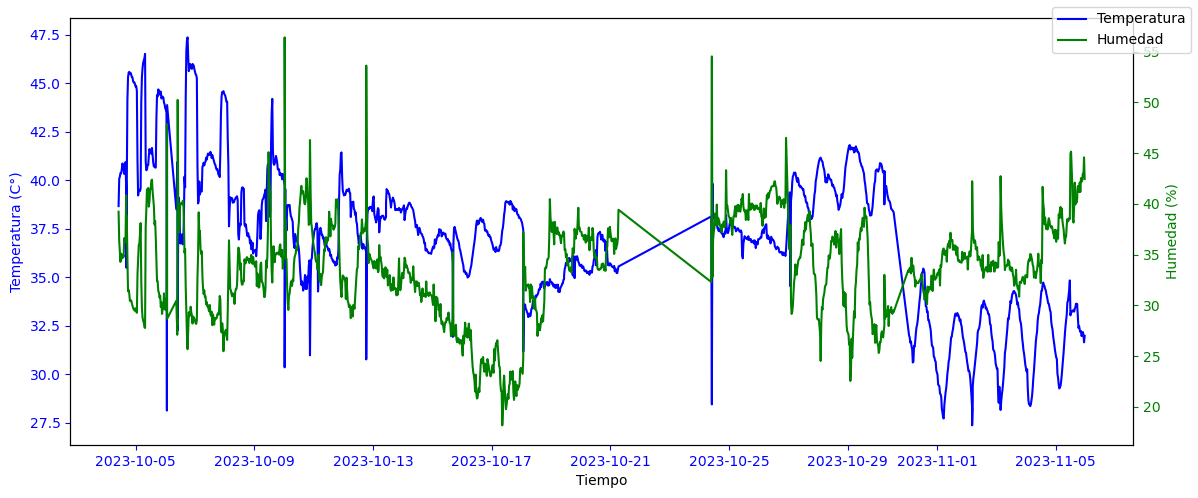

In [10]:
#Creamos figura comparando la humedad y la temperatura a traves del tiempo
fig, ax1 = plt.subplots(figsize=(12,5))
ax1.set_xlabel("Tiempo", color="k")
ax1.set_ylabel("Temperatura (C°)", color="b")
ax1.plot(datafull."Tiempo", datafull." Temperatura", label="Temperatura", color="b")
ax1.tick_params(colors="b")
ax2=ax1.twinx()
ax2.set_ylabel("Humedad (%)", color="g")
ax2.plot(datafull."Tiempo", datafull."Humedad", label="Humedad", color="g")
ax2.tick_params(colors="g")
fig.legend()
fig.tight_layout()

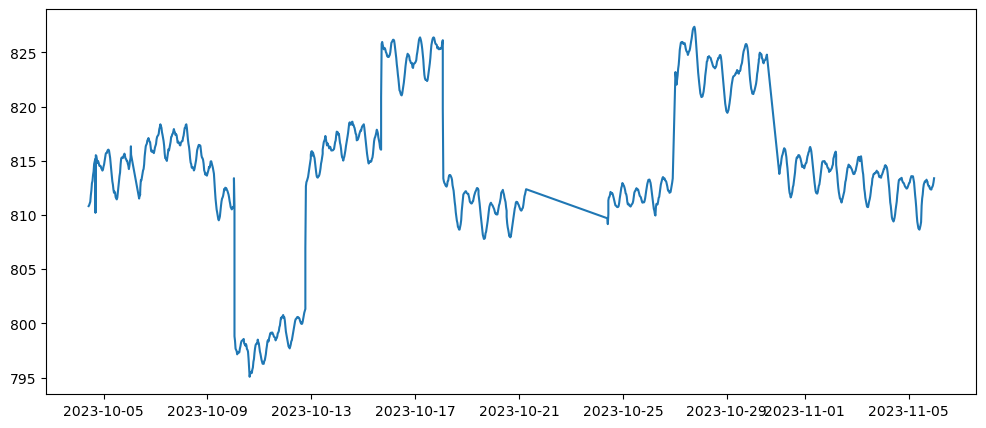

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7ff17ac47650>

In [11]:
#Creamos una figura comparando la Presión con el Tiempo
plt.figure(figsize=(12,5))
plt.plot(datafull."Tiempo", datafull."Presion")

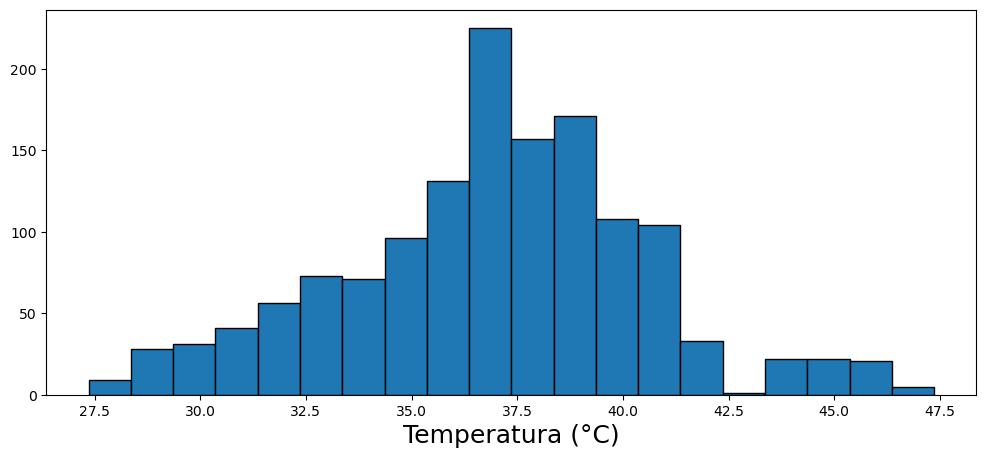

PyObject Text(0.5, 34.0, 'Temperatura (°C)')

In [12]:
plt.figure(figsize=(12,5))
plt.hist(datafull." Temperatura", bins=20, edgecolor="k")
plt.xlabel("Temperatura (°C)", fontsize=18)

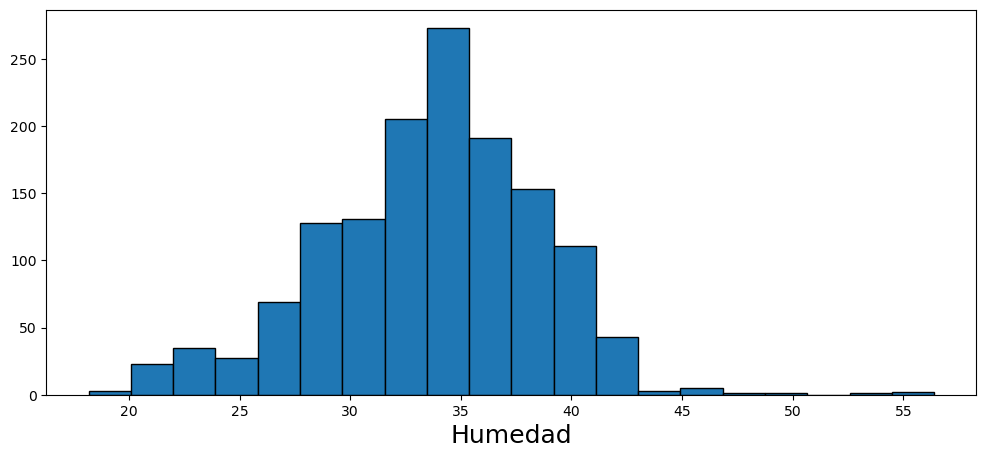

PyObject Text(0.5, 34.0, 'Humedad')

In [13]:
plt.figure(figsize=(12,5))
plt.hist(datafull."Humedad", bins=20, edgecolor="k")
plt.xlabel("Humedad", fontsize=18)

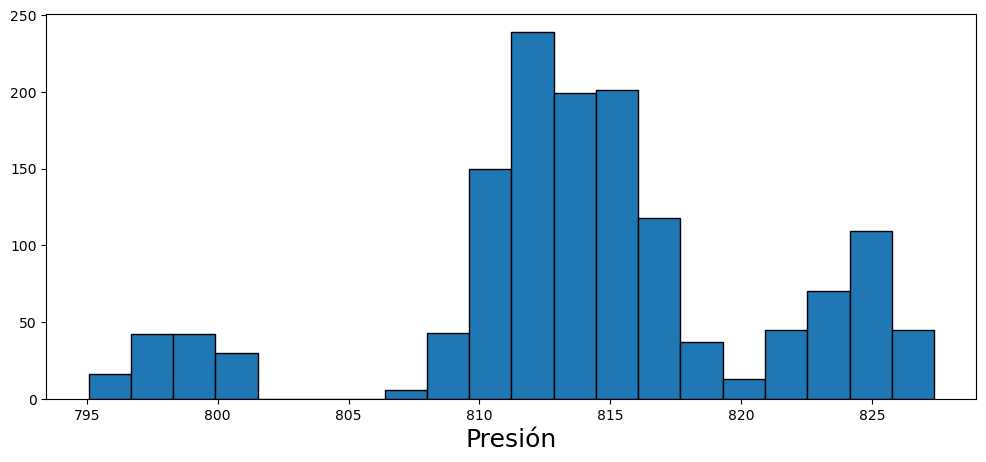

PyObject Text(0.5, 34.0, 'Presión')

In [14]:
plt.figure(figsize=(12,5))
plt.hist(datafull."Presion", bins=20, edgecolor="k")
plt.xlabel("Presión", fontsize=18)

## Creamos nuestras figuras utilizando el paquete de Plots de julia

In [4]:
using Plots

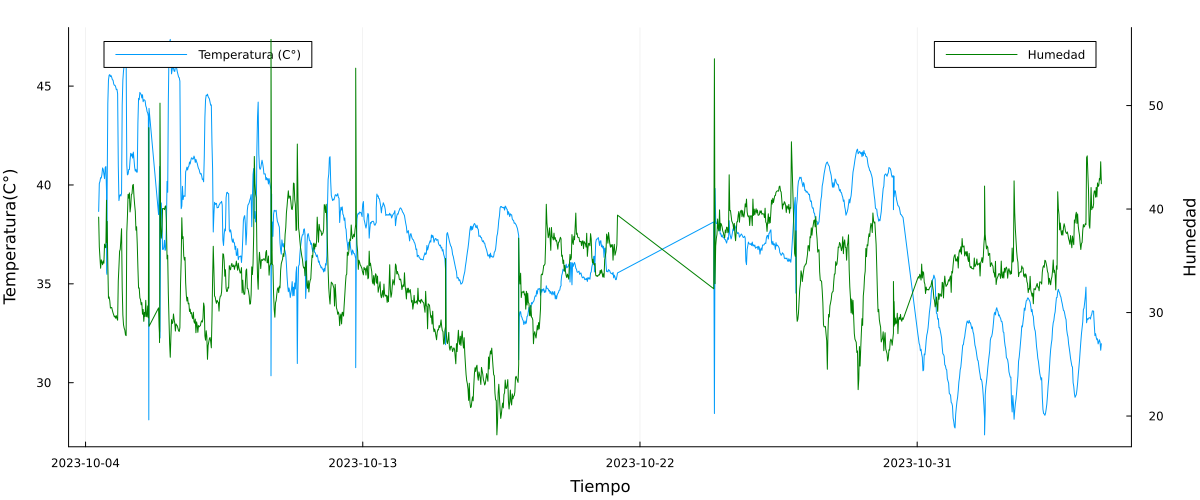

In [34]:
plot(datafull."Tiempo", datafull." Temperatura", label="Temperatura (C°)", legend=:topleft, xlabel="Tiempo", ylabel="Temperatura(C°)", margins=5Plots.mm)
plot!(twinx(), datafull."Tiempo", datafull."Humedad", color=:green, label="Humedad", ylabel="Humedad")
plot!(size=(1200,500))

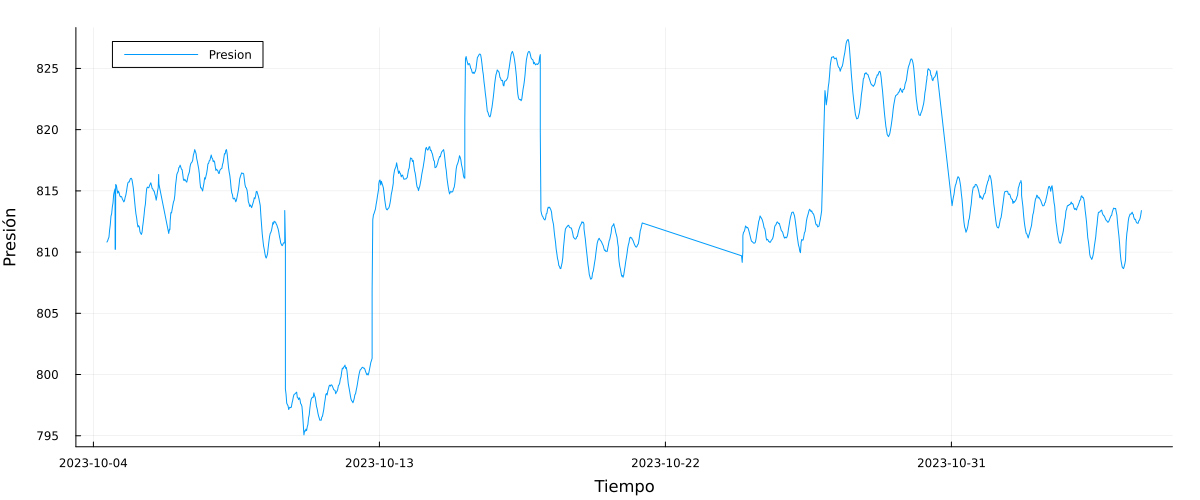

In [35]:
plot(datafull."Tiempo", datafull."Presion", label="Presion", xlabel="Tiempo", ylabel="Presión", margins=5Plots.mm)
plot!(size=(1200,500))

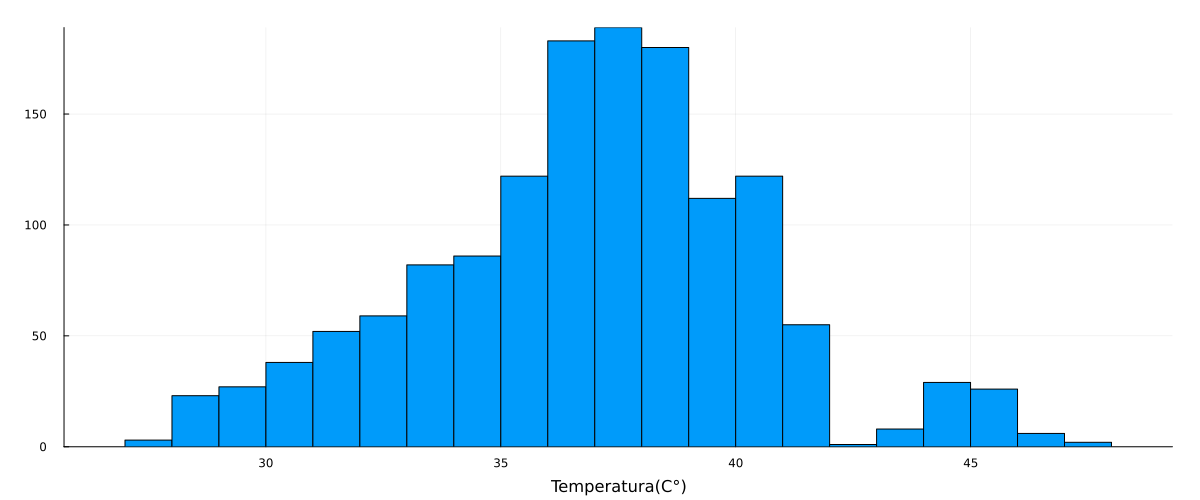

In [41]:
histogram(datafull." Temperatura", label=false, xlabel="Temperatura(C°)", bins=:20, margins=5Plots.mm)
plot!(size=(1200,500))

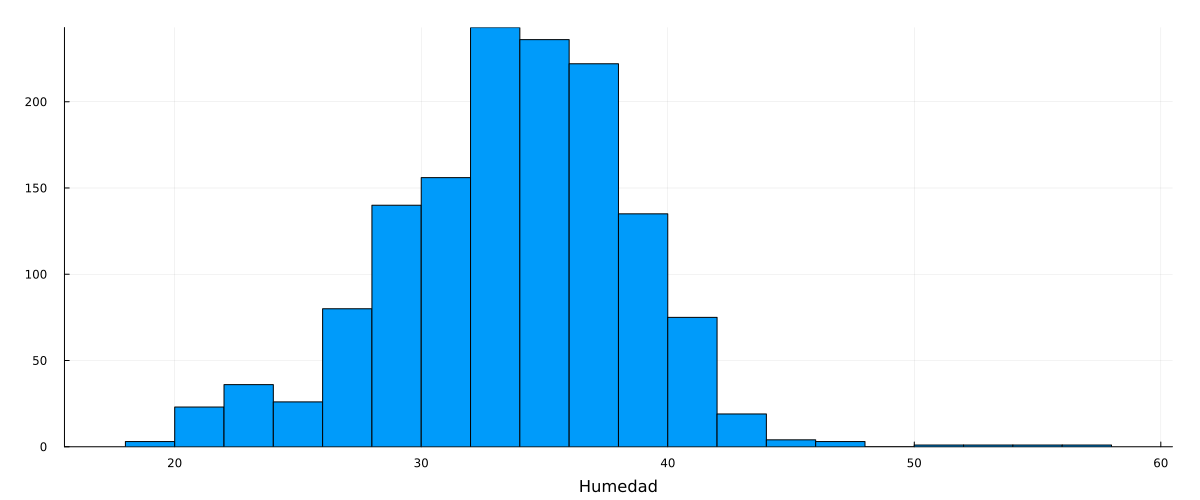

In [42]:
histogram(datafull."Humedad", label=false, xlabel="Humedad", bins=:20, margins=5Plots.mm)
plot!(size=(1200,500))

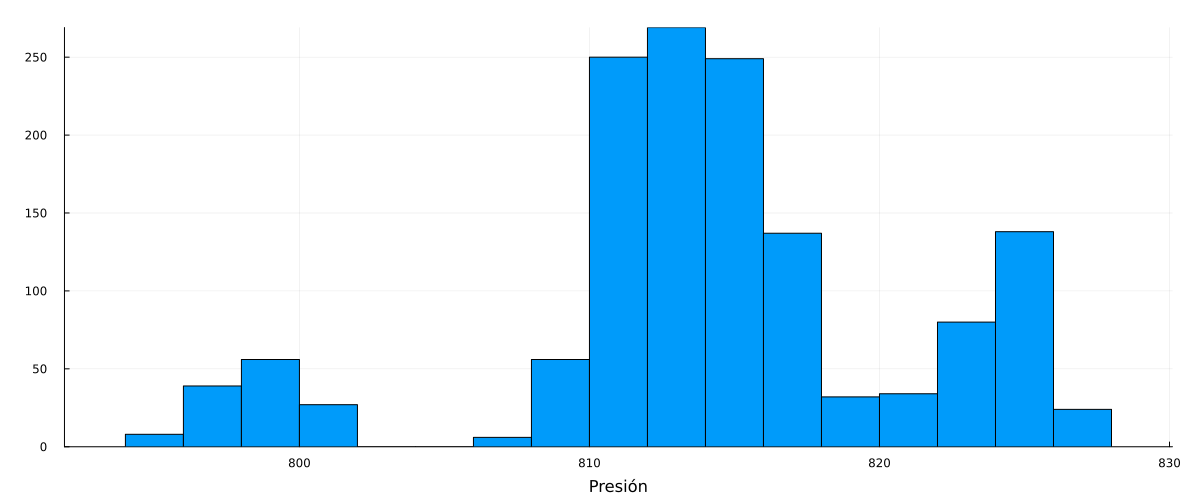

In [44]:
histogram(datafull."Presion", label=false, xlabel="Presión", bins=:20, margins=5Plots.mm)
plot!(size=(1200,500))